<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/Deep_fun2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.disable_eager_execution()
sess = tf.InteractiveSession()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
X =np.expand_dims(np.arange(0.0,3.0,.01),1)
Y =np.tanh(X**2)
x = tf.placeholder(tf.float64, [300,1],name='x')
y = tf.placeholder(tf.float64, [300,1],name='y')
loss_list1=[]
YP=[]

input_layer = tf.layers.dense(x, 300, activation= tf.nn.relu)
hidden_layer1 = tf.layers.dropout(input_layer,.2)
hidden_layer2 = tf.layers.dense(hidden_layer1,2,activation=tf.nn.relu)
hidden_layer3 = tf.layers.dense(hidden_layer2,3,activation=tf.nn.relu)
output_layer = tf.layers.dense(hidden_layer3,1)
Loss =tf.losses.mean_squared_error(y , output_layer)
Optimizer = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(Loss)
init = tf.global_variables_initializer()
sess.run(init)
for i in range(0,1000):
    fd ={x:X, y:Y}
    _, loss_val1 = sess.run([Optimizer, Loss], feed_dict=fd)
    #print ('loss = %s' % loss_val)
    loss_list1.append(loss_val1)
YP = sess.run(output_layer,feed_dict={x:X})


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:268: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  warnings.warn('`tf.layers.dropout` is deprecated and '


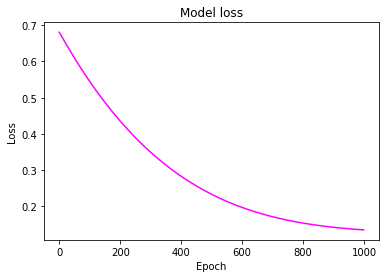

In [4]:
# Plot training  loss values
plt.plot(loss_list1,color='magenta')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


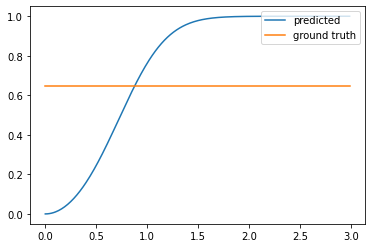

In [5]:
plt.plot(X,Y,label='predicted')
plt.plot(X,YP,label='ground truth')
plt.legend(loc='upper right')